In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
import matplotlib.pyplot as plt

from conf.hydra_config import (
    TrainingUnitEncoderConfig_STEP1,
)

try:
    path
except:
    path = "../"
    os.chdir(path)

cfg = TrainingUnitEncoderConfig_STEP1

cfg.dataset.name

'SWARA'

In [3]:
os.getcwd()

'/workspace/local'

In [4]:
import os
# Define the column names
column_names = ['path', 'transcript', 'speaker_id']

# Load the metadata from the CSV file
metadata_csv_path = 'resources/filelists/swara/metadata_SWARA1.0_text.csv'

path_exists = os.path.exists(metadata_csv_path)
print(path_exists)

metadata_df = pd.read_csv(metadata_csv_path, 
                          delimiter="|",
                          header=None,
                          names=column_names)

True


In [5]:
# Display the first few rows of the metadata
print(metadata_df.head())

                                                path  \
0  /media/DATA/CORPORA/SWARA2.0/SWARA1.0_22k/bas_...   
1  /media/DATA/CORPORA/SWARA2.0/SWARA1.0_22k/bas_...   
2  /media/DATA/CORPORA/SWARA2.0/SWARA1.0_22k/bas_...   
3  /media/DATA/CORPORA/SWARA2.0/SWARA1.0_22k/bas_...   
4  /media/DATA/CORPORA/SWARA2.0/SWARA1.0_22k/bas_...   

                                          transcript  speaker_id  
0  De asemenea, contează și dacă imobilul este la...           1  
1  Până în prezent, proiectul avea susținerea amb...           1  
2  Băimăreanul urăște lipsa de punctualitate și f...           1  
3  În acest cămin au prioritate studenții în ani ...           1  
4  Dincolo de efectele economice și comerciale, g...           1  


In [6]:
# Extract relevant information from the metadata
filepaths = metadata_df['path']
transcripts = metadata_df['transcript']
speaker_ids = metadata_df['speaker_id']

In [7]:
# Perform the train-test split, stratified by speaker_id
train_df, test_df = train_test_split(metadata_df, 
                                     test_size=0.05,
                                     random_state=cfg.train.seed, stratify=metadata_df['speaker_id']
)

In [8]:
# Display the number of samples in each set
print(f"Training samples: {len(train_df)}")
print(f"Testing samples: {len(test_df)}")

Training samples: 20238
Testing samples: 1066


In [9]:
import pandas as pd

# Assuming df is your DataFrame and 'speaker_ids' is your column
distribution = train_df['speaker_id'].value_counts()
print(distribution)

distribution = test_df['speaker_id'].value_counts()
print(distribution)

speaker_id
34    1419
10    1419
14    1418
22    1418
2     1418
1     1416
31    1412
35     946
7      946
11     946
20     946
33     946
28     946
15     946
39     945
36     944
19     932
30     875
Name: count, dtype: int64
speaker_id
14    75
22    75
2     75
34    74
31    74
1     74
10    74
7     50
11    50
33    50
15    50
28    50
39    50
35    50
36    50
20    50
19    49
30    46
Name: count, dtype: int64


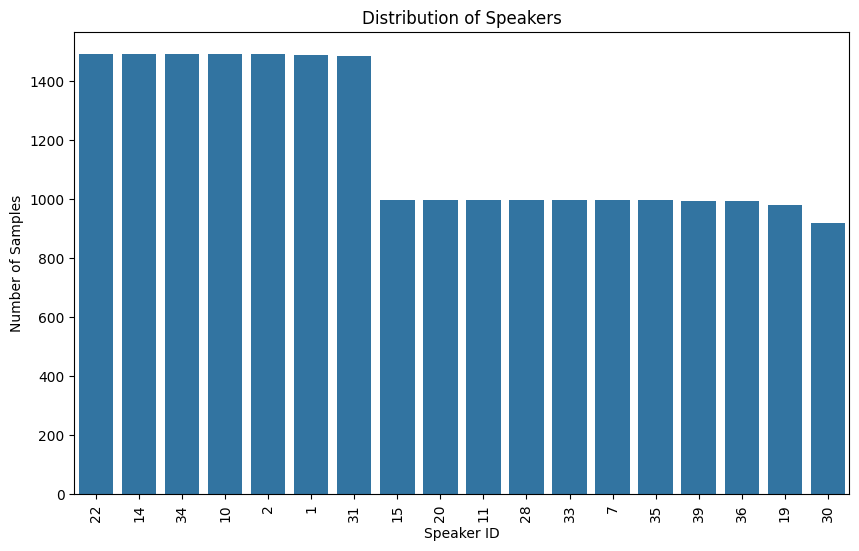

In [10]:
# Plot the distribution of speakers
plt.figure(figsize=(10, 6))
sns.countplot(data=metadata_df, x='speaker_id', order=metadata_df['speaker_id'].value_counts().index)
plt.title('Distribution of Speakers')
plt.xlabel('Speaker ID')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()

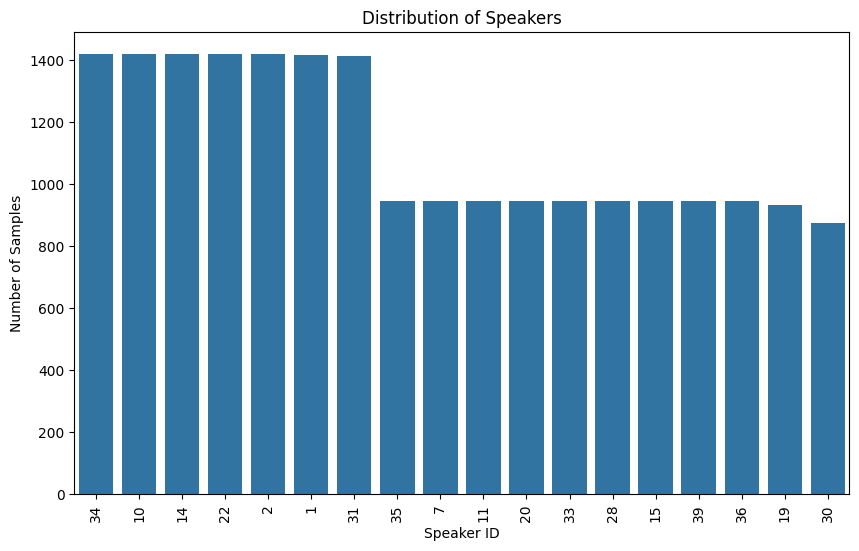

In [11]:
# Plot the distribution of speakers
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='speaker_id', order=train_df['speaker_id'].value_counts().index)
plt.title('Distribution of Speakers')
plt.xlabel('Speaker ID')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()

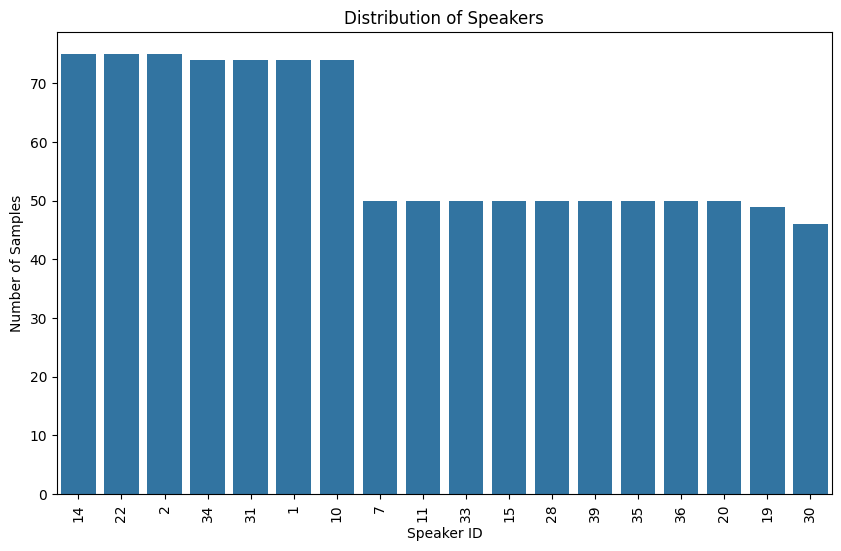

In [12]:
# Plot the distribution of speakers
plt.figure(figsize=(10, 6))
sns.countplot(data=test_df, x='speaker_id', order=test_df['speaker_id'].value_counts().index)
plt.title('Distribution of Speakers')
plt.xlabel('Speaker ID')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()

In [13]:
# Save train test split
train_df.to_csv(cfg.dataset.train_filelist_path, index=False, sep='|', header=False)
test_df.to_csv(cfg.dataset.test_filelist_path, index=False, sep='|', header=False)